In [1]:
pip install pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
orders = pd.read_csv(r"C:\Users\soura\OneDrive - The University of Texas at Dallas\Documents\Career\Side Projects\Datasets\Stratascratch\data_orders.csv")
offers = pd.read_csv(r"C:\Users\soura\OneDrive - The University of Texas at Dallas\Documents\Career\Side Projects\Datasets\Stratascratch\data_offers.csv")

In [4]:
orders.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


In [5]:
offers.head()

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030
4,3000583467642,300051001196


In [6]:
df = orders.merge(offers, on ='order_gk' , how = 'left')

In [7]:
df.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,3.000510e+11
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,3.000510e+11
2,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,3.000510e+11
3,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,3.000510e+11
4,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,3.000510e+11


In [8]:
df.describe()

,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id
count,34374.000000,34374.000000,8838.000000,3.437400e+04,34374.000000,34374.000000,23397.000000,3.126800e+04
mean,-0.964247,51.450683,478.235800,3.000600e+12,5.596701,0.257113,165.655084,3.000515e+11
std,0.021004,0.011386,286.791696,2.338789e+07,2.331139,0.437049,203.553389,4.752934e+05
min,-1.066957,51.399323,60.000000,3.000550e+12,4.000000,0.000000,3.000000,3.000506e+11
25%,-0.974268,51.444834,238.000000,3.000584e+12,4.000000,0.000000,57.000000,3.000510e+11
50%,-0.966529,51.452126,419.000000,3.000595e+12,4.000000,0.000000,108.000000,3.000515e+11
75%,-0.949824,51.456692,658.750000,3.000624e+12,9.000000,1.000000,196.000000,3.000519e+11
max,-0.867088,51.496169,1559.000000,3.000633e+12,9.000000,1.000000,4303.000000,3.000524e+11


In [9]:
# Build up distribution of orders according to reasons for failure: cancellations before and after driver assignment, and reasons for order rejection.

In [10]:
df.shape

(34374, 9)

In [11]:
df.isnull().sum()

order_datetime                       0
origin_longitude                     0
origin_latitude                      0
m_order_eta                      25536
order_gk                             0
order_status_key                     0
is_driver_assigned_key               0
cancellations_time_in_seconds    10977
offer_id                          3106
dtype: int64

In [12]:
df['is_driver_assigned_key'].value_counts()

is_driver_assigned_key
0    25536
1     8838
Name: count, dtype: int64

In [13]:
driver_not_assigned = df[df['is_driver_assigned_key'] == 0]

In [14]:
driver_not_assigned['cancellations_time_in_seconds'].describe()

count    14564.000000
mean       121.771972
std        110.190324
min          3.000000
25%         53.000000
50%        100.000000
75%        169.000000
max       4097.000000
Name: cancellations_time_in_seconds, dtype: float64

In [15]:
driver_not_assigned.isnull().sum()

order_datetime                       0
origin_longitude                     0
origin_latitude                      0
m_order_eta                      25536
order_gk                             0
order_status_key                     0
is_driver_assigned_key               0
cancellations_time_in_seconds    10972
offer_id                          2632
dtype: int64

In [16]:
driver_assigned = df[df['is_driver_assigned_key'] == 1]

In [17]:
driver_assigned['cancellations_time_in_seconds'].describe()

count    8833.000000
mean      238.010302
std       285.178352
min         6.000000
25%        62.000000
50%       129.000000
75%       291.000000
max      4303.000000
Name: cancellations_time_in_seconds, dtype: float64

In [18]:
driver_assigned.isnull().sum()

order_datetime                     0
origin_longitude                   0
origin_latitude                    0
m_order_eta                        0
order_gk                           0
order_status_key                   0
is_driver_assigned_key             0
cancellations_time_in_seconds      5
offer_id                         474
dtype: int64

In [19]:
driver_not_assigned['order_status_key'].value_counts()

order_status_key
4    14564
9    10972
Name: count, dtype: int64

In [20]:
#cancelled by client since no driver was assigned
reason1 = driver_not_assigned[driver_not_assigned['order_status_key'] == 4]

#cancelled by system since no driver was assigned
reason2 = driver_not_assigned[driver_not_assigned['order_status_key'] == 9]

In [21]:
driver_assigned['order_status_key'].value_counts()

order_status_key
4    8833
9       5
Name: count, dtype: int64

In [22]:
driver_assigned[driver_assigned['order_status_key'] == 4]['cancellations_time_in_seconds'].describe()

count    8833.000000
mean      238.010302
std       285.178352
min         6.000000
25%        62.000000
50%       129.000000
75%       291.000000
max      4303.000000
Name: cancellations_time_in_seconds, dtype: float64

In [23]:
driver_assigned['m_order_eta'].describe()

count    8838.000000
mean      478.235800
std       286.791696
min        60.000000
25%       238.000000
50%       419.000000
75%       658.750000
max      1559.000000
Name: m_order_eta, dtype: float64

In [24]:
#cancelled by client since the driver took more time than eta to reach
reason3 = driver_assigned[driver_assigned['cancellations_time_in_seconds'] > driver_assigned['m_order_eta']]

In [25]:
reason4 = driver_assigned[driver_assigned['cancellations_time_in_seconds'] <= driver_assigned['m_order_eta']]

In [26]:
reason1['cancellation_reason'] = 'Unassigned - User Cancelled'
reason2['cancellation_reason'] = 'Unassigned - Expired'
reason3['cancellation_reason'] = 'Assigned - Driver Late'
reason4['cancellation_reason'] = 'Assigned - Cancelled Early'

C:\Users\soura\AppData\Local\Temp\ipykernel_7044\1053011388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reason1['cancellation_reason'] = 'Unassigned - User Cancelled'
C:\Users\soura\AppData\Local\Temp\ipykernel_7044\1053011388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reason2['cancellation_reason'] = 'Unassigned - Expired'
C:\Users\soura\AppData\Local\Temp\ipykernel_7044\1053011388.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [27]:
all_reasons = pd.concat([reason1, reason2, reason3, reason4], ignore_index=True)

In [28]:
reason_counts = all_reasons['cancellation_reason'].value_counts()

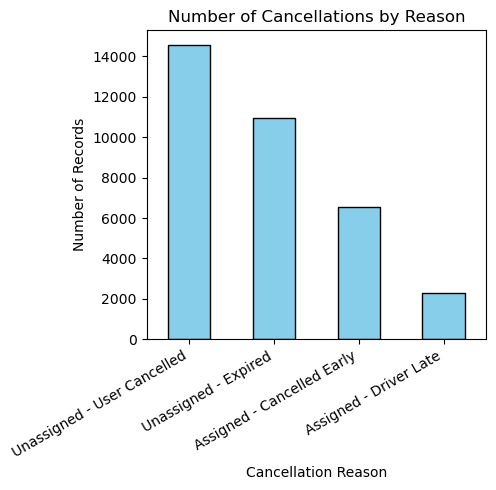

In [29]:
# Bar chart
plt.figure(figsize=(5, 5))
reason_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Number of Cancellations by Reason')
plt.xlabel('Cancellation Reason')
plt.ylabel('Number of Records')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Inferences from the above graph



In [30]:
#Plot the distribution of failed orders by hours.
#Is there a trend that certain hours have an abnormally high proportion of one category or another? 
#What hours are the biggest fails? How can this be explained?

In [31]:
df.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,3.000510e+11
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,3.000510e+11
2,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,3.000510e+11
3,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,3.000510e+11
4,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,3.000510e+11


In [32]:
df.dtypes

order_datetime                    object
origin_longitude                 float64
origin_latitude                  float64
m_order_eta                      float64
order_gk                           int64
order_status_key                   int64
is_driver_assigned_key             int64
cancellations_time_in_seconds    float64
offer_id                         float64
dtype: object

In [33]:
df['order_datetime'] = pd.to_datetime(df['order_datetime'], format = '%H:%M:%S')
df['order_time'] = df['order_datetime'].dt.hour + df['order_datetime'].dt.minute / 60

In [34]:
df.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id,order_time
0,1900-01-01 18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,3.000510e+11,18.133333
1,1900-01-01 20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,3.000510e+11,20.950000
2,1900-01-01 20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,3.000510e+11,20.950000
3,1900-01-01 20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,3.000510e+11,20.950000
4,1900-01-01 12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,3.000510e+11,12.116667


In [35]:
df['order_time'].describe()

count    34374.000000
mean        12.969802
std          7.648195
min          0.000000
25%          7.700000
50%         13.516667
75%         20.783333
max         23.983333
Name: order_time, dtype: float64

([<matplotlib.axis.XTick at 0x1fa56253c50>,
 [Text(0, 0, '0'),
  Text(3, 0, '3'),
  Text(6, 0, '6'),
  Text(9, 0, '9'),
  Text(12, 0, '12'),
  Text(15, 0, '15'),
  Text(18, 0, '18'),
  Text(21, 0, '21'),
  Text(24, 0, '24')])

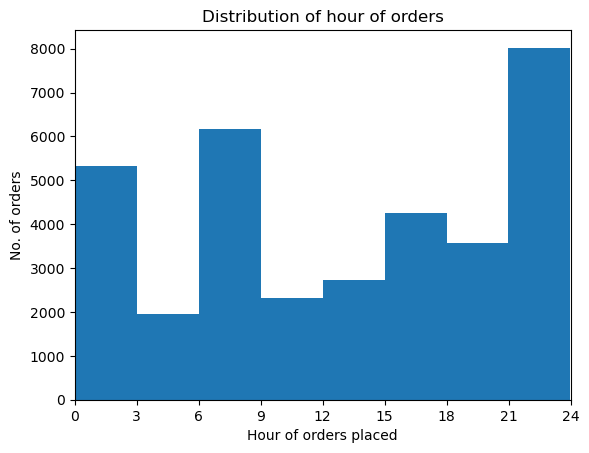

In [85]:
plt.hist(df['order_time'], bins = 8)
plt.title("Distribution of hour of orders")
plt.xlabel("Hour of orders placed")
plt.ylabel("No. of orders")
plt.xlim(0,24)
plt.xticks([0,3,6,9,12,15,18,21,24])

In [ ]:
#Inferences from the graph

#1 - The no. of order failures are high during early mornings (12am to 3am), mornings (6am to 9am), late nights (9pm to 12pm)

In [37]:
_12am_to_3am = df[df['order_time'] < 3]
_3am_to_6am = df[(df['order_time'] >= 3) & (df['order_time'] < 6)]
_6am_to_9am = df[(df['order_time'] >= 6) & (df['order_time'] < 9)]
_9am_to_12pm = df[(df['order_time'] >= 9) & (df['order_time'] < 12)]

_12pm_to_3pm = df[(df['order_time'] >= 12) & (df['order_time'] < 15)]
_3pm_to_6pm = df[(df['order_time'] >= 15) & (df['order_time'] < 18)]
_6pm_to_9pm = df[(df['order_time'] >= 18) & (df['order_time'] < 21)]
_9pm_to_12am = df[(df['order_time'] >= 21) & (df['order_time'] < 24)]

In [67]:
hourly_failures = {
    'Duration' :['_12am_to_3am','_3am_to_6am','_6am_to_9am','_9am_to_12pm','_12pm_to_3pm','_3pm_to_6pm','_6pm_to_9pm','_9pm_to_12am'],
    'Order Failures' : [_12am_to_3am.shape[0],_3am_to_6am.shape[0],_6am_to_9am.shape[0],_9am_to_12pm.shape[0],_12pm_to_3pm.shape[0],_3pm_to_6pm.shape[0],_6pm_to_9pm.shape[0],_9pm_to_12am.shape[0]]
}

In [68]:
hf = pd.DataFrame(hourly_failures)

In [69]:
hf

,Duration,Order Failures
0,_12am_to_3am,5332
1,_3am_to_6am,1959
2,_6am_to_9am,6171
3,_9am_to_12pm,2328
4,_12pm_to_3pm,2726
5,_3pm_to_6pm,4254
6,_6pm_to_9pm,3582
7,_9pm_to_12am,8022


In [71]:
#_12am_to_3am - p1
p1_r1 = _12am_to_3am.loc[_12am_to_3am.index.intersection(reason1.index)]
p1_r2 = _12am_to_3am.loc[_12am_to_3am.index.intersection(reason2.index)]
p1_r3 = _12am_to_3am.loc[_12am_to_3am.index.intersection(reason3.index)]
p1_r4 = _12am_to_3am.loc[_12am_to_3am.index.intersection(reason4.index)]

#_3am_to_6am - p2
p2_r1 = _3am_to_6am.loc[_3am_to_6am.index.intersection(reason1.index)]
p2_r2 = _3am_to_6am.loc[_3am_to_6am.index.intersection(reason2.index)]
p2_r3 = _3am_to_6am.loc[_3am_to_6am.index.intersection(reason3.index)]
p2_r4 = _3am_to_6am.loc[_3am_to_6am.index.intersection(reason4.index)]

#_6am_to_9am - p3
p3_r1 = _6am_to_9am.loc[_6am_to_9am.index.intersection(reason1.index)]
p3_r2 = _6am_to_9am.loc[_6am_to_9am.index.intersection(reason2.index)]
p3_r3 = _6am_to_9am.loc[_6am_to_9am.index.intersection(reason3.index)]
p3_r4 = _6am_to_9am.loc[_6am_to_9am.index.intersection(reason4.index)]

#_9am_to_12pm - p4
p4_r1 = _9am_to_12pm.loc[_9am_to_12pm.index.intersection(reason1.index)]
p4_r2 = _9am_to_12pm.loc[_9am_to_12pm.index.intersection(reason2.index)]
p4_r3 = _9am_to_12pm.loc[_9am_to_12pm.index.intersection(reason3.index)]
p4_r4 = _9am_to_12pm.loc[_9am_to_12pm.index.intersection(reason4.index)]

#_12pm_to_3pm - p5
p5_r1 = _12pm_to_3pm.loc[_12pm_to_3pm.index.intersection(reason1.index)]
p5_r2 = _12pm_to_3pm.loc[_12pm_to_3pm.index.intersection(reason2.index)]
p5_r3 = _12pm_to_3pm.loc[_12pm_to_3pm.index.intersection(reason3.index)]
p5_r4 = _12pm_to_3pm.loc[_12pm_to_3pm.index.intersection(reason4.index)]

#_3pm_to_6pm - p6
p6_r1 = _3pm_to_6pm.loc[_3pm_to_6pm.index.intersection(reason1.index)]
p6_r2 = _3pm_to_6pm.loc[_3pm_to_6pm.index.intersection(reason2.index)]
p6_r3 = _3pm_to_6pm.loc[_3pm_to_6pm.index.intersection(reason3.index)]
p6_r4 = _3pm_to_6pm.loc[_3pm_to_6pm.index.intersection(reason4.index)]

#_6pm_to_9pm - p7
p7_r1 = _6pm_to_9pm.loc[_6pm_to_9pm.index.intersection(reason1.index)]
p7_r2 = _6pm_to_9pm.loc[_6pm_to_9pm.index.intersection(reason2.index)]
p7_r3 = _6pm_to_9pm.loc[_6pm_to_9pm.index.intersection(reason3.index)]
p7_r4 = _6pm_to_9pm.loc[_6pm_to_9pm.index.intersection(reason4.index)]

#_9pm_to_12am - p8
p8_r1 = _9pm_to_12am.loc[_9pm_to_12am.index.intersection(reason1.index)]
p8_r2 = _9pm_to_12am.loc[_9pm_to_12am.index.intersection(reason2.index)]
p8_r3 = _9pm_to_12am.loc[_9pm_to_12am.index.intersection(reason3.index)]
p8_r4 = _9pm_to_12am.loc[_9pm_to_12am.index.intersection(reason4.index)]

In [73]:
p1_r1.shape[0]

2393

In [74]:
hf['reason1'] = [p1_r1.shape[0],p2_r1.shape[0],p3_r1.shape[0],p4_r1.shape[0],p5_r1.shape[0],p6_r1.shape[0],p7_r1.shape[0],p8_r1.shape[0]]
hf['reason2'] = [p1_r2.shape[0],p2_r2.shape[0],p3_r2.shape[0],p4_r2.shape[0],p5_r2.shape[0],p6_r2.shape[0],p7_r2.shape[0],p8_r2.shape[0]]
hf['reason3'] = [p1_r3.shape[0],p2_r3.shape[0],p3_r3.shape[0],p4_r3.shape[0],p5_r3.shape[0],p6_r3.shape[0],p7_r3.shape[0],p8_r3.shape[0]]
hf['reason4'] = [p1_r4.shape[0],p2_r4.shape[0],p3_r4.shape[0],p4_r4.shape[0],p5_r4.shape[0],p6_r4.shape[0],p7_r4.shape[0],p8_r4.shape[0]]

In [75]:
hf

,Duration,Order Failures,reason1,reason2,reason3,reason4
0,_12am_to_3am,5332,2393,2020,347,568
1,_3am_to_6am,1959,751,858,148,202
2,_6am_to_9am,6171,2268,2128,211,1564
3,_9am_to_12pm,2328,792,484,252,800
4,_12pm_to_3pm,2726,1151,605,234,736
5,_3pm_to_6pm,4254,1885,979,310,1079
6,_6pm_to_9pm,3582,1516,965,335,766
7,_9pm_to_12am,8022,3808,2933,446,835


In [80]:
hf_filtered = hf.drop(columns = ['Order Failures'])

In [81]:
hf_filtered

,Duration,reason1,reason2,reason3,reason4
0,_12am_to_3am,2393,2020,347,568
1,_3am_to_6am,751,858,148,202
2,_6am_to_9am,2268,2128,211,1564
3,_9am_to_12pm,792,484,252,800
4,_12pm_to_3pm,1151,605,234,736
5,_3pm_to_6pm,1885,979,310,1079
6,_6pm_to_9pm,1516,965,335,766
7,_9pm_to_12am,3808,2933,446,835


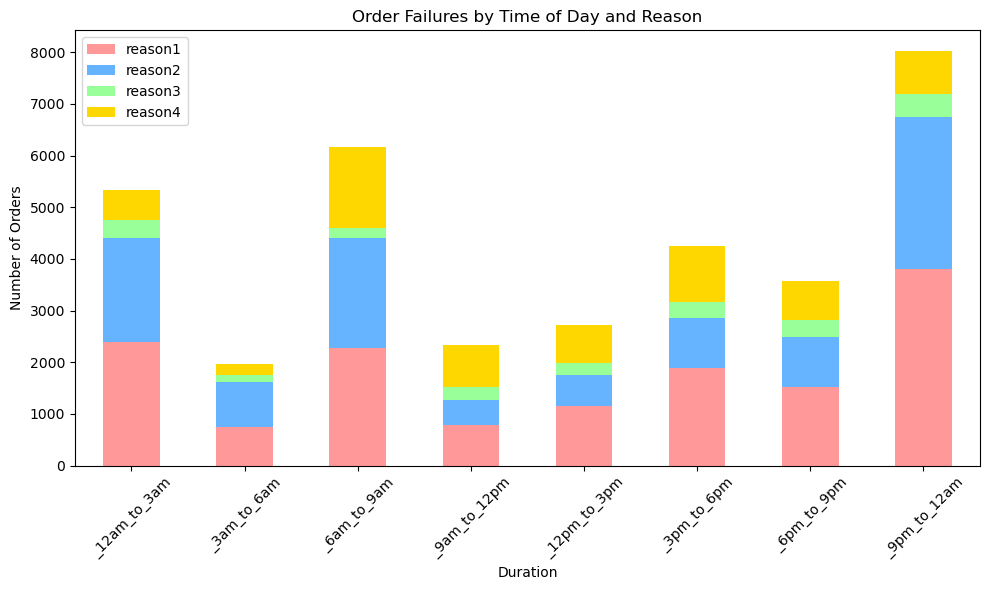

In [83]:
hf_filtered.plot(
    x='Duration',
    kind='bar',
    stacked=True,
    color=['#FF9999', '#66B3FF', '#99FF99', '#FFD700'],  # optional colors
    figsize=(10,6)
)

plt.ylabel('Number of Orders')
plt.title('Order Failures by Time of Day and Reason')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Inferences from the above graph



In [ ]:
#Plot the average time to cancellation with and without driver, by the hour. If there are any outliers in the data, it would be better to remove them. 
#Can we draw any conclusions from this plot?

In [86]:
df.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id,order_time
0,1900-01-01 18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,3.000510e+11,18.133333
1,1900-01-01 20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,3.000510e+11,20.950000
2,1900-01-01 20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,3.000510e+11,20.950000
3,1900-01-01 20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,3.000510e+11,20.950000
4,1900-01-01 12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,3.000510e+11,12.116667


In [87]:
driver_assigned['cancellations_time_in_seconds'].describe()

count    8833.000000
mean      238.010302
std       285.178352
min         6.000000
25%        62.000000
50%       129.000000
75%       291.000000
max      4303.000000
Name: cancellations_time_in_seconds, dtype: float64

In [88]:
driver_not_assigned['cancellations_time_in_seconds'].describe()

count    14564.000000
mean       121.771972
std        110.190324
min          3.000000
25%         53.000000
50%        100.000000
75%        169.000000
max       4097.000000
Name: cancellations_time_in_seconds, dtype: float64

In [94]:
avg1 = np.mean(driver_assigned['cancellations_time_in_seconds']) / 60*60

In [95]:
avg2 = np.mean(driver_not_assigned['cancellations_time_in_seconds']) / 60*60

In [99]:
labels = ['Driver Assigned', 'Driver Not Assigned']
values = [avg1, avg2]

Text(0, 0.5, 'Cancellation times in hour')

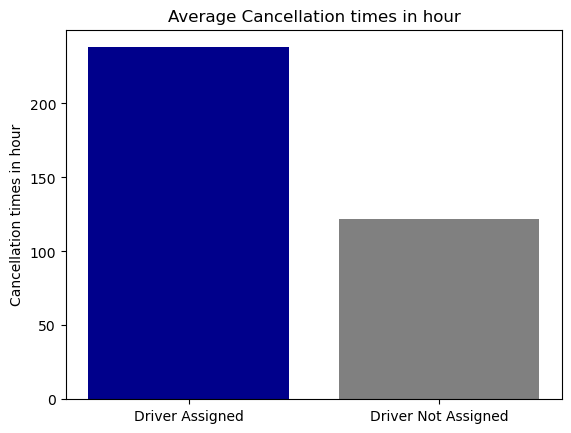

In [108]:
plt.bar(labels,values,color=['darkblue','grey'])
plt.title("Average Cancellation times in hour")
plt.ylabel("Cancellation times in hour")

Text(0.5, 1.0, 'Boxplot of cancellation times when driver is assigned')

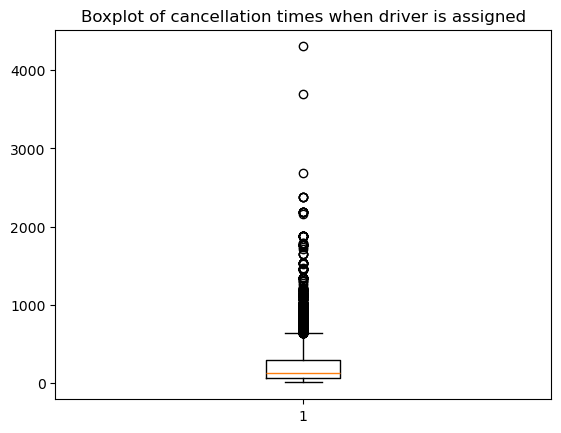

In [114]:
plt.boxplot(driver_assigned['cancellations_time_in_seconds'].dropna())
plt.title('Boxplot of cancellation times when driver is assigned')

Text(0.5, 1.0, 'Boxplot of cancellation times when driver is not assigned')

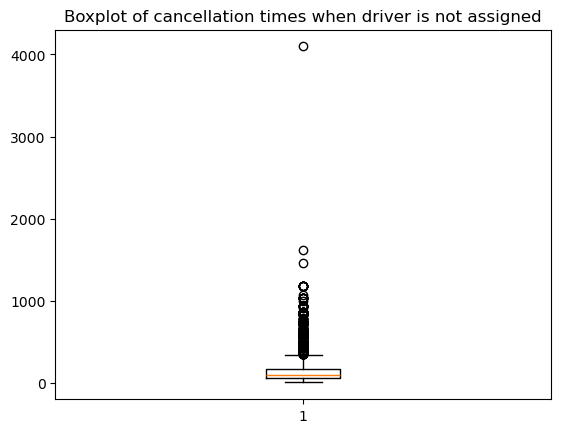

In [115]:
plt.boxplot(driver_not_assigned['cancellations_time_in_seconds'].dropna())
plt.title('Boxplot of cancellation times when driver is not assigned')

In [135]:
#Remove outliers

Q1 = driver_assigned['cancellations_time_in_seconds'].quantile(0.25)
Q3 = driver_assigned['cancellations_time_in_seconds'].quantile(0.75)
IQR = Q3 - Q1

q1 = driver_not_assigned['cancellations_time_in_seconds'].quantile(0.25)
q3 = driver_not_assigned['cancellations_time_in_seconds'].quantile(0.75)
iqr = q3 - q1

da_no_outliers = driver_assigned[(((driver_assigned['cancellations_time_in_seconds']) > (Q1 - 1.5 * IQR)) | ((driver_assigned['cancellations_time_in_seconds']) < (Q3 + 1.5 * IQR)))]
dan_no_outliers = driver_not_assigned[(((driver_not_assigned['cancellations_time_in_seconds']) > (q1 - 1.5 * iqr)) | ((driver_not_assigned['cancellations_time_in_seconds']) < (q3 + 1.5 * iqr)))]

avg1 = np.mean(da_no_outliers['cancellations_time_in_seconds']) / 3600
avg2 = np.mean(dan_no_outliers['cancellations_time_in_seconds']) / 3600

Text(0, 0.5, 'Cancellation times in hour')

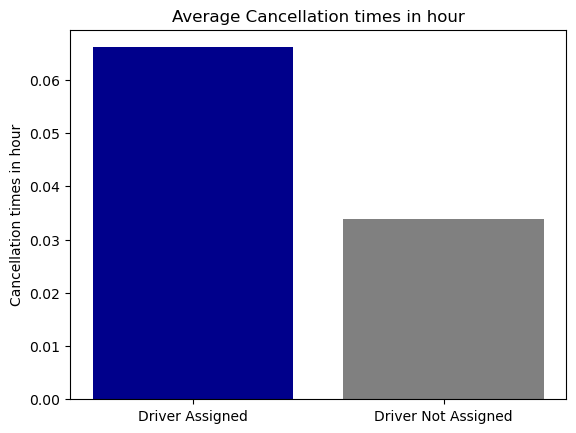

In [136]:
labels = ['Driver Assigned', 'Driver Not Assigned']
values = [avg1, avg2]

plt.bar(labels,values,color=['darkblue','grey'])
plt.title("Average Cancellation times in hour")
plt.ylabel("Cancellation times in hour")

In [ ]:
# Inferences from the above graph



In [138]:
avg1*3600

np.float64(238.0103022755576)

In [140]:
avg2*3600

np.float64(121.77197198571822)

In [141]:
#Plot the distribution of average ETA by hours. How can this plot be explained?

df.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id,order_time
0,1900-01-01 18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,3.000510e+11,18.133333
1,1900-01-01 20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,3.000510e+11,20.950000
2,1900-01-01 20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,3.000510e+11,20.950000
3,1900-01-01 20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,3.000510e+11,20.950000
4,1900-01-01 12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,3.000510e+11,12.116667


In [146]:
df['m_order_eta'].mean()

np.float64(478.2357999547409)

In [155]:
avg_eta = [_12am_to_3am['m_order_eta'].mean()/3600,
           _3am_to_6am['m_order_eta'].mean()/3600,
           _6am_to_9am['m_order_eta'].mean()/3600,
           _9am_to_12pm['m_order_eta'].mean()/3600,
           _12pm_to_3pm['m_order_eta'].mean()/3600,
           _3pm_to_6pm['m_order_eta'].mean()/3600,
           _6pm_to_9pm['m_order_eta'].mean()/3600,
           _9pm_to_12am['m_order_eta'].mean()/3600
          ]

In [156]:
hf_filtered['avg_eta'] = avg_eta

In [157]:
hf_filtered2 = hf_filtered.drop(columns = ['reason1','reason2', 'reason3', 'reason4'])

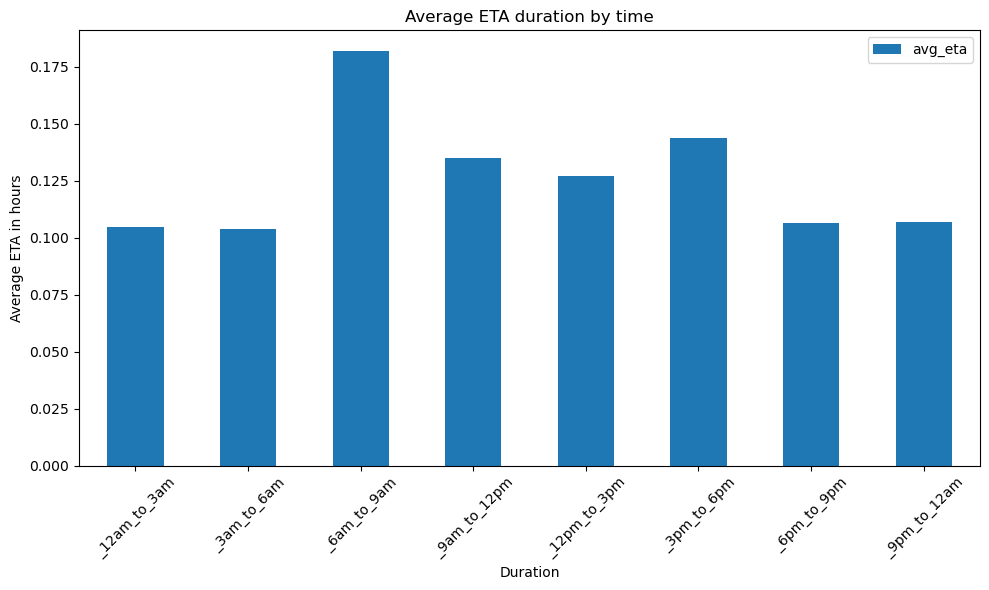

In [159]:
hf_filtered2.plot(
    x = 'Duration',
    kind = 'bar',
    figsize=(10,6)
)

plt.ylabel('Average ETA in hours')
plt.title('Average ETA duration by time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Inferences from the above graph

